In [66]:
%pip install phrasetopicminer --force-reinstall

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  Using cached phrasetopicminer-0.2.0-py3-none-any.whl.metadata (35 kB)
  Using cached beautifulsoup4-4.14.3-py3-none-any.whl.metadata (3.8 kB)
  Using cached datamapplot-0.6.4-py3-none-any.whl.metadata (7.8 kB)
  Using cached hdbscan-0.8.40-cp312-cp312-macosx_10_13_universal2.whl.metadata (15 kB)
  Using cached Markdown-3.7-py3-none-any.whl.metadata (7.0 kB)
  Using cached nltk-3.9.2-py3-none-any.whl.metadata (3.2 kB)
  Using cached numpy-1.26.4-cp312-cp312-macosx_11_0_arm64.whl.metadata (61 kB)
  Using cached openai_agents-0.6.2-py3-none-any.whl.metadata (13 kB)
  Using cached pandas-2.3.3-cp312-cp312-macosx_11_0_arm64.whl.metadata (91 kB)
  Using cached plotly-5.24.1-py3-none-any.whl.metadata (7.3 kB)
  Using cached pydantic-2.12.5-py3-none-any.whl.metadata (90 kB)
  Using cached scikit_learn-1.7.2-cp312-cp312-macosx_12_0_arm64.whl.metadata (11 kB)
  Using cached sentence_transformers-3.4.1-py3-none-any.whl.metadata (10 kB)
  Using cached spacy-3.8.11-cp312-cp312-macosx_11_0_arm64.w

In [1]:
import sys
import phrasetopicminer as ptm

print("Python:", sys.version)
print("Executable:", sys.executable)
print("PTM version:", ptm.__version__)
print("PTM module file:", ptm.__file__)
print("Available top-level names:", [n for n in dir(ptm) if not n.startswith("_")])


/Users/ahmadhashemi/tmp_nlp312/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Python: 3.12.7 (main, Nov 30 2025, 22:18:21) [Clang 16.0.0 (clang-1600.0.26.3)]
Executable: /Users/ahmadhashemi/tmp_nlp312/.venv/bin/python
PTM version: 0.2.0
PTM module file: /Users/ahmadhashemi/tmp_nlp312/.venv/lib/python3.12/site-packages/phrasetopicminer/__init__.py
Available top-level names: ['ClusterLabelingInput', 'ClusterLabelingResult', 'LabeledTopicCluster', 'PackageNotFoundError', 'PhraseMiner', 'PhraseRecord', 'TopicCluster', 'TopicCoreResult', 'TopicLabelModel', 'TopicLabeler', 'TopicLabelingResult', 'TopicModeler', 'TopicTimelineBuilder', 'TopicTimelineResult', 'build_phrase_sentence_examples_from_occurrences', 'make_datamapplot_interactive', 'make_datamapplot_static', 'phrase_miner', 'plot_phrase_bubble_map', 'plot_phrase_treemap', 'plot_topic_timeline', 'topic_labeler', 'topic_modeler', 'topic_timeline', 'topic_viz', 'version', 'visualization_datamap']


In [2]:
txt1 = """
Phrase-based topic modeling treats noun phrases and verb phrases as the
main carriers of meaning in a document collection. Instead of working at
the level of single tokens, we mine phrases such as "neural topic model",
"customer feedback", or "research pipeline". This phrase-centric view makes
clusters easier to interpret, because each topic is anchored in human
readable expressions rather than abstract word distributions.
"""

txt2 ="""
In recurring team meetings, the same themes appear again and again:
roadmap decisions, technical debt, customer pain points, and hiring plans.
PhraseTopicMiner can mine key phrases from the transcripts, cluster them
into topics, and then project those phrase clusters into a two-dimensional
map. Each cluster becomes a labeled island of discussion, helping product
and engineering leaders see which themes dominate the conversation over time.
"""

txt3 = """
When exploring a new research field, we often read dozens of papers without
    a clear overview of the main conceptual structure. By extracting phrases
    such as "contrastive learning objective", "causal inference", or "human
    evaluation protocol" from abstracts and introductions, PhraseTopicMiner
    builds a geometric map of ideas. The resulting clusters highlight families
    of methods, evaluation strategies, and application domains in a way that is
    visually intuitive and analytically useful.
"""

txt4 = """
User interview transcripts are full of recurring expressions: people
    describe friction, workarounds, and desired outcomes in surprisingly
    consistent language. A phrase-centric topic model can surface patterns like
    "manual spreadsheet export", "notification overload", or "difficult onboarding
    experience". Clustering those phrases reveals coherent themes in the voice
    of the user, which can then be prioritized and tracked across releases.
"""

txt5 ="""
Educators working with large collections of lecture notes, assignments, and
    discussion forum posts often struggle to see which concepts confuse students
    the most. Mining phrases such as "backpropagation intuition", "regularization
    trade-off", or "evaluation metric" and grouping them into topics provides a
    living map of conceptual difficulty. This can guide revision of teaching
    materials and the design of targeted practice exercises.
"""

txt6 = """
Over time, the language of a project, product, or research field evolves.
    New phrases appear while others gradually disappear. PhraseTopicMiner can
    track phrase clusters as timelines, showing when ideas emerge, stabilize,
    or fade out. This temporal view helps teams notice conceptual drift early
    and decide whether it reflects healthy innovation or a loss of focus.
"""

txt7 = """
In the history of ideas and intellectual history, we often track how key
    concepts are articulated, contested, and transformed across different
    genres of writing: pamphlets, newspaper articles, treatises, and speeches.
    Instead of counting single words like "freedom" or "despotism", a
    phrase-centric topic model focuses on richer expressions such as
    "freedom under law", "arbitrary royal power", "constitutional limits",
    "rights of the people", or "religious authority".

    By mining and clustering these multi-word phrases, PhraseTopicMiner can
    surface distinct conceptual constellations that correspond to competing
    vocabularies of freedom, authority, and community. Each cluster becomes a
    map of how authors link key ideas together in practice, not just in theory.
    When we add a temporal dimension, these phrase clusters can be followed
    across years or decades, revealing when certain constellations emerge,
    overlap, or decline. This complements close reading: the historian still
    interprets texts line by line, but now against a geometric overview of
    conceptual change in the archive.
"""

texts = [txt1, txt2, txt3, txt4, txt5, txt6, txt7]

## `PhraseMiner`

In [3]:
%%time
# 1) Phrase mining
miner = ptm.PhraseMiner(
    method="spacy",
    spacy_model="en_core_web_lg",
    include_verb_phrases=True,
    clean_markdown=True,
)

/Users/ahmadhashemi/tmp_nlp312/.venv/lib/python3.12/site-packages/spacy/util.py:969: UserWarning: [W095] Model 'en_core_web_lg' (3.7.1) was trained with spaCy v3.7.2 and may not be 100% compatible with the current version (3.8.11). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


CPU times: user 2.79 s, sys: 636 ms, total: 3.42 s
Wall time: 17.5 s


In [4]:
%%time
np_counter, vp_counters, phrase_records, sentences_by_doc = miner.mine_phrases_with_types(texts)

print("Total NP phrases:", len(np_counter))
print("Total VP phrases:", sum(len(v) for v in vp_counters.values()))
print("Number of phrase records:", len(phrase_records))
print("Docs / sentences:", [len(sents) for sents in sentences_by_doc])

Total NP phrases: 95
Total VP phrases: 47
Number of phrase records: 164
Docs / sentences: [3, 3, 3, 3, 3, 4, 2]
CPU times: user 446 ms, sys: 12.2 ms, total: 458 ms
Wall time: 475 ms


## `TopicModeler`

In [5]:
%%time
# 2) Topic modeling (core clustering API)
modeler = ptm.TopicModeler(
    embedding_backend="sentence_transformers",   # or "spacy", "openai", "cohere", "custom"
    embedding_model="all-MiniLM-L6-v2",
    embedding_fn=None,    # only if embedding_backend="custom"
    spacy_nlp=None,       # only if embedding_backend="spacy"
    random_state=42,
)


CPU times: user 26 μs, sys: 7 μs, total: 33 μs
Wall time: 39.8 μs


In [6]:
%%time
core = modeler.fit_core(
    # --- required core inputs ---
    phrase_records=phrase_records,
    sentences_by_doc=sentences_by_doc,

    # --- phrase filtering options ---
    include_kinds={"NP", "VP"},          # only NP; use {"NP", "VP"} to include both
    include_patterns={"BaseNP", "NP+PP", "NP+multiPP", 
                      "VerbObj", "VerbPP", "SubjVerb"
                      },  # or e.g. {"BaseNP", "NP+PP"}
    min_freq_unigram=3,            # threshold for 1-word phrases
    min_freq_bigram=1,             # threshold for 2-word phrases
    min_freq_trigram_plus=1,       # threshold for >=3-word phrases

    # --- geometric pipeline options ---
    pca_n_components=10,           # 0 or None if you want to skip PCA
    cluster_geometry="umap_2d",    # "umap_nd" or "umap_2d"
    umap_n_neighbors=5,
    umap_min_dist=0.1,
    umap_cluster_n_components=10,  # target dim for clustering (if using umap_nd)

    # --- clustering options ---
    clustering_algorithm="hdbscan",   # "hdbscan" or "kmeans"
    hdbscan_min_cluster_size=5,
    hdbscan_min_samples=None,
    hdbscan_metric="euclidean",
    kmeans_max_clusters=15,          # used only if clustering_algorithm="kmeans"

    # --- visualization geometry ---
    viz_reducer="tsne_2d",           # "same", "umap_2d", or "tsne_2d"
    tsne_perplexity=30.0,
    tsne_learning_rate=200.0,
    tsne_n_iter=1000,

    # --- cluster representatives ---
    top_n_representatives=10,

    verbose=True,
)


[TopicModeler] Step 1/12 – filtering PhraseRecords by kind/pattern...
[TopicModeler]   → kept 163 occurrences after filtering.
[TopicModeler] Step 2/12 – built occurrence map for 151 phrases (freq source: reconstructed_from_records).
[TopicModeler] Step 3/12 – phrase DataFrame has 151 rows before n-gram filtering.
[TopicModeler] Step 4/12 – 112 phrases remain after n-gram thresholds.
[TopicModeler] Step 5/12 – phrase_sentences built for 112 phrases.
[TopicModeler] Step 6/12 – embedding 112 phrases...


Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 21.32it/s]


[TopicModeler]   → embeddings computed with backend='sentence_transformers'.
[TopicModeler] Step 7/12 – PCA denoising to 10 dims.


/Users/ahmadhashemi/tmp_nlp312/.venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


[TopicModeler] Step 8/12 – UMAP geometry (umap_2d).


/Users/ahmadhashemi/tmp_nlp312/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/ahmadhashemi/tmp_nlp312/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[TopicModeler] Step 9/12 – clustering with 'hdbscan'.
[TopicModeler] Step 10/12 – computing 2D viz embedding via 'tsne_2d'.
[TopicModeler] Step 11/12 – aggregating TopicCluster objects.
[TopicModeler] Step 12/12 – assembling TopicCoreResult.
CPU times: user 12.2 s, sys: 4.29 s, total: 16.5 s
Wall time: 16.1 s


In [7]:
print(f" --- config ---\n{core.config}")

 --- config ---
{'embedding_backend': 'sentence_transformers', 'embedding_model_name': 'all-MiniLM-L6-v2', 'pca_n_components': 10, 'cluster_geometry': 'umap_2d', 'umap_n_neighbors': 5, 'umap_min_dist': 0.1, 'umap_cluster_n_components': 10, 'clustering_algorithm': 'hdbscan', 'hdbscan_min_cluster_size': 5, 'hdbscan_min_samples': None, 'hdbscan_metric': 'euclidean', 'kmeans_max_clusters': 15, 'viz_reducer': 'tsne_2d', 'tsne_perplexity': 30.0, 'tsne_learning_rate': 200.0, 'tsne_n_iter': 1000, 'min_freq_unigram': 3, 'min_freq_bigram': 1, 'min_freq_trigram_plus': 1, 'include_kinds': {'NP', 'VP'}, 'include_patterns': ['BaseNP', 'NP+PP', 'NP+multiPP', 'SubjVerb', 'VerbObj', 'VerbPP'], 'random_state': 42, 'num_documents': 7, 'num_sentences_total': 21, 'phrase_frequency_source': 'reconstructed_from_records'}


In [8]:
phrases_df = core.phrases_df
phrases_df.head()

phrase  count  n_tokens  \
0                               phrase      4         1   
1                     phrasetopicminer      3         1   
2                              phrases      3         1   
5                  centric topic model      2         3   
8  living map of conceptual difficulty      1         5   

                                           embedding  cluster_id         x  \
0  [0.036300506, 0.081972726, 0.015533596, 0.0889...           0 -5.836439   
1  [-0.013518695, 0.011223617, -0.04242844, -0.03...           0 -4.188855   
2  [0.021204585, 0.06599245, 0.054480646, 0.08563...           0 -6.172174   
5  [0.054263435, -0.10006323, -0.023572342, -0.02...           1  5.540416   
8  [0.16411746, -0.022378359, -0.033917874, -0.00...           3 -2.820733   

           y  
0  10.037709  
1   8.565555  
2   9.499350  
5   6.309296  
8   2.132549

In [9]:
clusters = core.clusters
clusters[0]

TopicCluster(cluster_id=0, phrases=['phrase', 'phrasetopicminer', 'phrases', 'phrases reveals', 'mining phrases', 'new phrases', 'phrases appear', 'phrase clusters as timelines', 'track phrase clusters', 'key phrases from the transcripts', 'mine key phrases', 'phrase clusters', 'verb phrases', 'mine phrases', 'user interview transcripts', 'extracting phrases'], phrase_counts=[4, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], total_count=23, representative_phrases=['phrase', 'phrases', 'phrasetopicminer', 'phrases appear', 'mining phrases', 'phrases reveals', 'phrase clusters', 'extracting phrases', 'verb phrases', 'mine phrases'], importance_score=65.16390691329298)

In [10]:
phrase_occurrences = core.phrase_occurrences
phrase_occurrences

{'topic modeling treats noun phrases': [PhraseRecord(phrase='topic modeling treats noun phrases', surface='topic modeling treats noun phrases', kind='NP', pattern='BaseNP', doc_index=0, sent_index=0)],
 'verb phrases': [PhraseRecord(phrase='verb phrases', surface='verb phrases', kind='NP', pattern='BaseNP', doc_index=0, sent_index=0)],
 'main carriers of meaning in a document collection': [PhraseRecord(phrase='main carriers of meaning in a document collection', surface='main carriers of meaning in a document collection', kind='NP', pattern='NP+multiPP', doc_index=0, sent_index=0)],
 'based topic modeling treats noun phrases': [PhraseRecord(phrase='based topic modeling treats noun phrases', surface='based topic modeling treats noun phrases', kind='VP', pattern='VerbObj', doc_index=0, sent_index=0)],
 'level of single tokens': [PhraseRecord(phrase='level of single tokens', surface='level of single tokens', kind='NP', pattern='NP+PP', doc_index=0, sent_index=1)],
 'phrases': [PhraseRecord

In [11]:
phrase_sentences = core.phrase_sentences
phrase_sentences

{'topic modeling treats noun phrases': ['Phrase-based topic modeling treats noun phrases and verb phrases as the\nmain carriers of meaning in a document collection.'],
 'verb phrases': ['Phrase-based topic modeling treats noun phrases and verb phrases as the\nmain carriers of meaning in a document collection.'],
 'main carriers of meaning in a document collection': ['Phrase-based topic modeling treats noun phrases and verb phrases as the\nmain carriers of meaning in a document collection.'],
 'based topic modeling treats noun phrases': ['Phrase-based topic modeling treats noun phrases and verb phrases as the\nmain carriers of meaning in a document collection.'],
 'level of single tokens': ['Instead of working at\nthe level of single tokens, we mine phrases such as "neural topic model",\n"customer feedback", or "research pipeline".'],
 'phrases': ['Instead of working at\nthe level of single tokens, we mine phrases such as "neural topic model",\n"customer feedback", or "research pipeline

## `TopicTimelineBuilder`

In [12]:
%%time
# 3Build timeline
timeline_builder = ptm.TopicTimelineBuilder(
    timeline_mode="reading_time",
    speech_rate_wpm=200,
    log_fn=print,  # or st.markdown, rich console logger, etc.
)

CPU times: user 20 μs, sys: 14 μs, total: 34 μs
Wall time: 40.1 μs


In [13]:
%%time
timeline = timeline_builder.build(core_result=core,
                                  sentences_by_doc=sentences_by_doc)

▶ Building sentence-level timeline…
▶ Linking phrases to sentences…
▶ Aggregating sentences per cluster…
✅ TopicTimelineBuilder finished.
CPU times: user 20.8 ms, sys: 4.47 ms, total: 25.2 ms
Wall time: 22.5 ms


In [14]:
cluster_sentence_df = timeline.cluster_sentence_df
cluster_sentence_df

cluster_id                                   sentence_indices  \
0          -1                                           [(6, 1)]   
1           0  [(0, 0), (0, 1), (0, 2), (1, 1), (2, 1), (3, 0...   
2           1   [(0, 0), (0, 1), (0, 2), (3, 1), (4, 1), (6, 1)]   
3           2  [(1, 0), (1, 2), (2, 0), (3, 2), (4, 0), (5, 2...   
4           3  [(0, 0), (0, 2), (2, 0), (2, 1), (3, 0), (4, 0...   
5           4                           [(3, 1), (4, 0), (4, 2)]   
6           5  [(0, 1), (1, 0), (1, 2), (2, 2), (3, 0), (3, 1...   
7           6  [(0, 1), (0, 2), (1, 0), (1, 2), (2, 1), (4, 1...   
8           7  [(0, 1), (1, 0), (1, 2), (2, 0), (2, 1), (2, 2...   

                              sentence_start_ms_list  \
0                                         [119100.0]   
1  [0.0, 5700.0, 12300.0, 25200.0, 44400.0, 58500...   
2  [0.0, 5700.0, 12300.0, 64200.0, 82500.0, 11910...   
3  [18900.0, 31800.0, 38100.0, 69300.0, 75600.0, ...   
4  [0.0, 12300.0, 38100.0, 44400.0, 58500.0, 7560...   
5                        [64200.0, 75600.0, 89400.0]   
6  [5700.0, 18900.0, 31800.0, 51900.0, 58500.0, 6...   
7  [5700.0, 12300.0, 18900.0, 31800.0, 44400.0, 8...   
8  [5700.0, 18900.0, 31800.0, 38100.0, 44400.0, 5...   

                             sentence_start_min_list  \
0                                            [1.985]   
1  [0.0, 0.095, 0.205, 0.42, 0.74, 0.975, 1.07, 1...   
2            [0.0, 0.095, 0.205, 1.07, 1.375, 1.985]   
3    [0.315, 0.53, 0.635, 1.155, 1.26, 1.655, 1.835]   
4  [0.0, 0.205, 0.635, 0.74, 0.975, 1.26, 1.375, ...   
5                                 [1.07, 1.26, 1.49]   
6  [0.095, 0.315, 0.53, 0.865, 0.975, 1.07, 1.155...   
7  [0.095, 0.205, 0.315, 0.53, 0.74, 1.375, 1.73,...   
8  [0.095, 0.315, 0.53, 0.635, 0.74, 0.865, 0.975...   

                                  sentence_text_list  num_sentences  
0  [Instead of counting single words like "freedo...              1  
1  [Phrase-based topic modeling treats noun phras...             12  
2  [Phrase-based topic modeling treats noun phras...              6  
3  [In recurring team meetings, the same themes a...              7  
4  [Phrase-based topic modeling treats noun phras...             11  
5  [A phrase-centric topic model can surface patt...              3  
6  [Instead of working at\nthe level of single to...             10  
7  [Instead of working at\nthe level of single to...              8  
8  [Instead of working at\nthe level of single to...             10

In [15]:
phrase_sentence_df = timeline.phrase_sentence_df
print(f"phrase_sentence_df shape: {phrase_sentence_df.shape}\n","---"*10)
phrase_sentence_df.head(3)

phrase_sentence_df shape: (120, 13)
 ------------------------------


phrase  cluster_id  \
0                 topic modeling treats noun phrases           1   
1                                       verb phrases           0   
2  main carriers of meaning in a document collection           3   

   global_count  occurrence_index  doc_index  sent_index  \
0             1                 0          0           0   
1             1                 0          0           0   
2             1                 0          0           0   

                                       sentence_text  sentence_start_ms  \
0  Phrase-based topic modeling treats noun phrase...                0.0   
1  Phrase-based topic modeling treats noun phrase...                0.0   
2  Phrase-based topic modeling treats noun phrase...                0.0   

   sentence_start_min  sentence_duration_ms  timeline_idx kind     pattern  
0                 0.0                5700.0             0   NP      BaseNP  
1                 0.0                5700.0             0   NP      BaseNP  
2                 0.0                5700.0             0   NP  NP+multiPP

In [16]:
sentence_df = timeline.sentence_df
print(f"sentence_df shape: {sentence_df.shape}\n","---"*10)
sentence_df.head(3)

sentence_df shape: (21, 9)
 ------------------------------


doc_index  sent_index                                      sentence_text  \
0          0           0  Phrase-based topic modeling treats noun phrase...   
1          0           1  Instead of working at\nthe level of single tok...   
2          0           2  This phrase-centric view makes\nclusters easie...   

   word_count  timeline_idx  start_ms   end_ms  duration_ms  start_min  
0          19             0       0.0   5700.0       5700.0      0.000  
1          22             1    5700.0  12300.0       6600.0      0.095  
2          22             2   12300.0  18900.0       6600.0      0.205

In [17]:
timeline.config

{'timeline_mode': 'reading_time',
 'speech_rate_wpm': 200.0,
 'reset_time_per_document': False}

## `topic_viz`

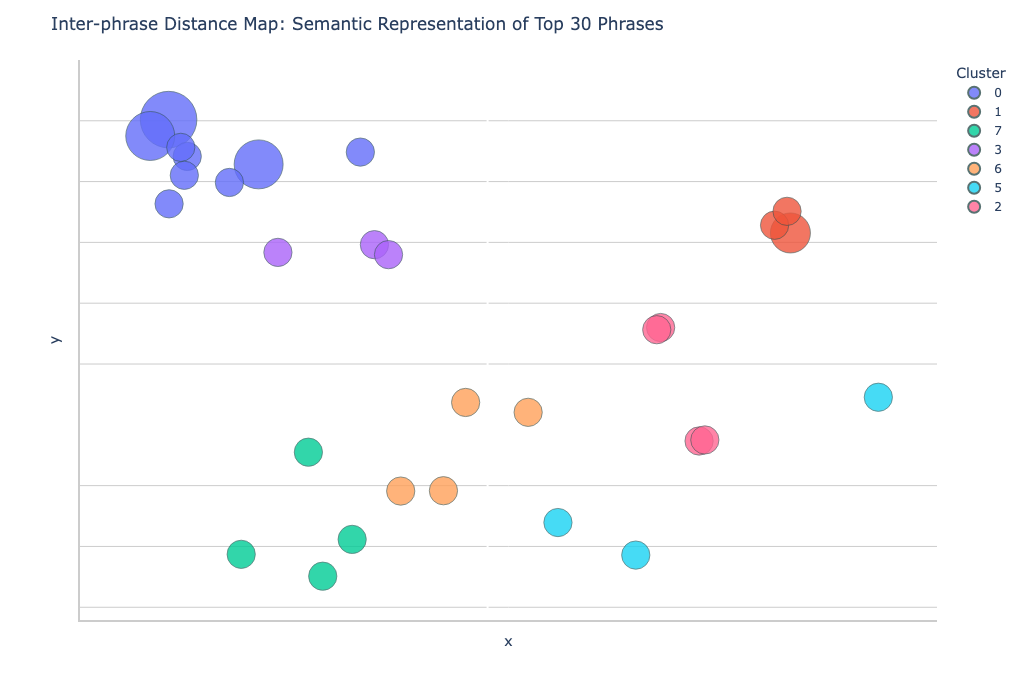

In [18]:
ptm.plot_phrase_bubble_map(core, max_phrases=30, show_text=False)

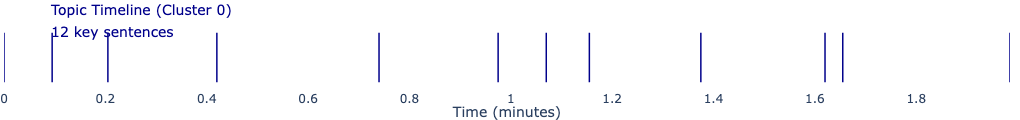

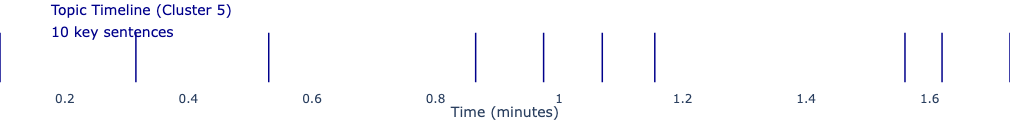

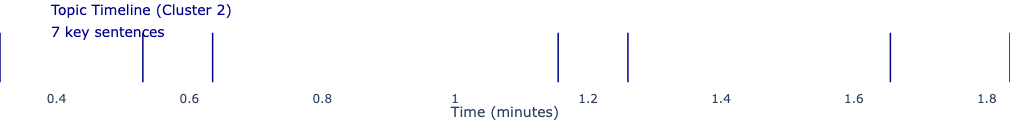

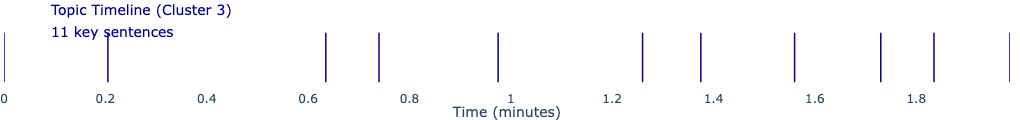

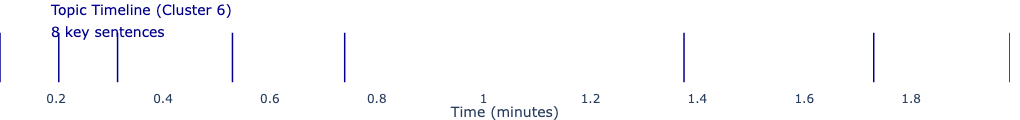

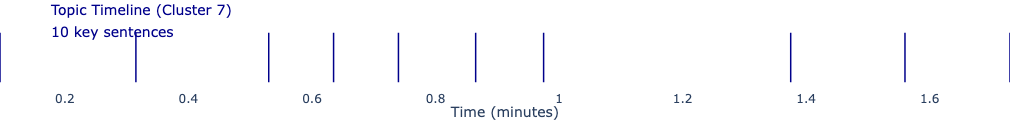

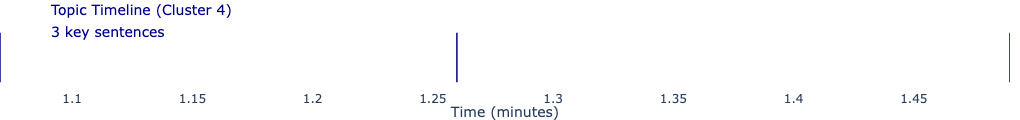

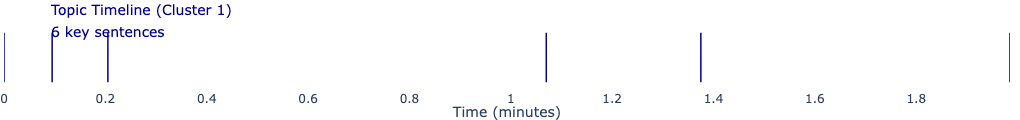

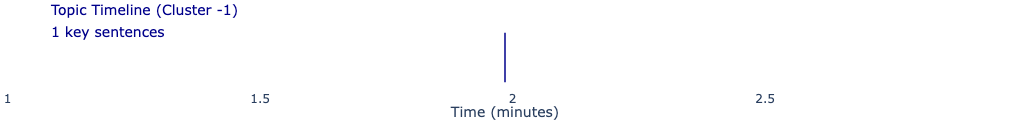

In [19]:
for i in range(len(core.clusters)):
    cluster_to_show = core.clusters[i].cluster_id
    ptm.plot_topic_timeline(timeline, cluster_id=cluster_to_show, time_unit="min").show()

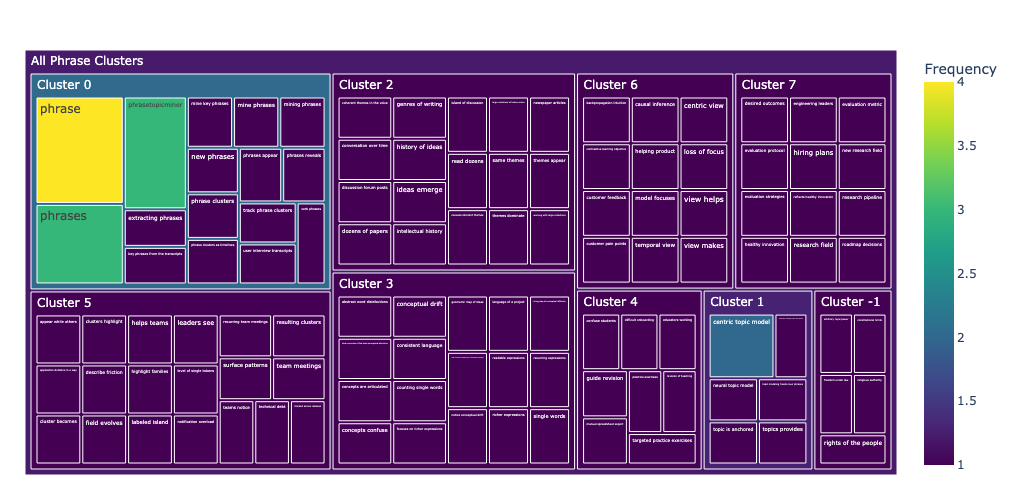

In [20]:
treemap_fig = ptm.plot_phrase_treemap(core_result=core)
treemap_fig.show()

## `visualization_datamap`

In [21]:
# Build phrase → sentence examples
phrase_sentence_examples = ptm.build_phrase_sentence_examples_from_occurrences(
    core,
    sentences_by_doc,
    max_sentences_per_phrase=3,
    min_sentence_chars=30,
)

Calculating medoids: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  4.22it/s]


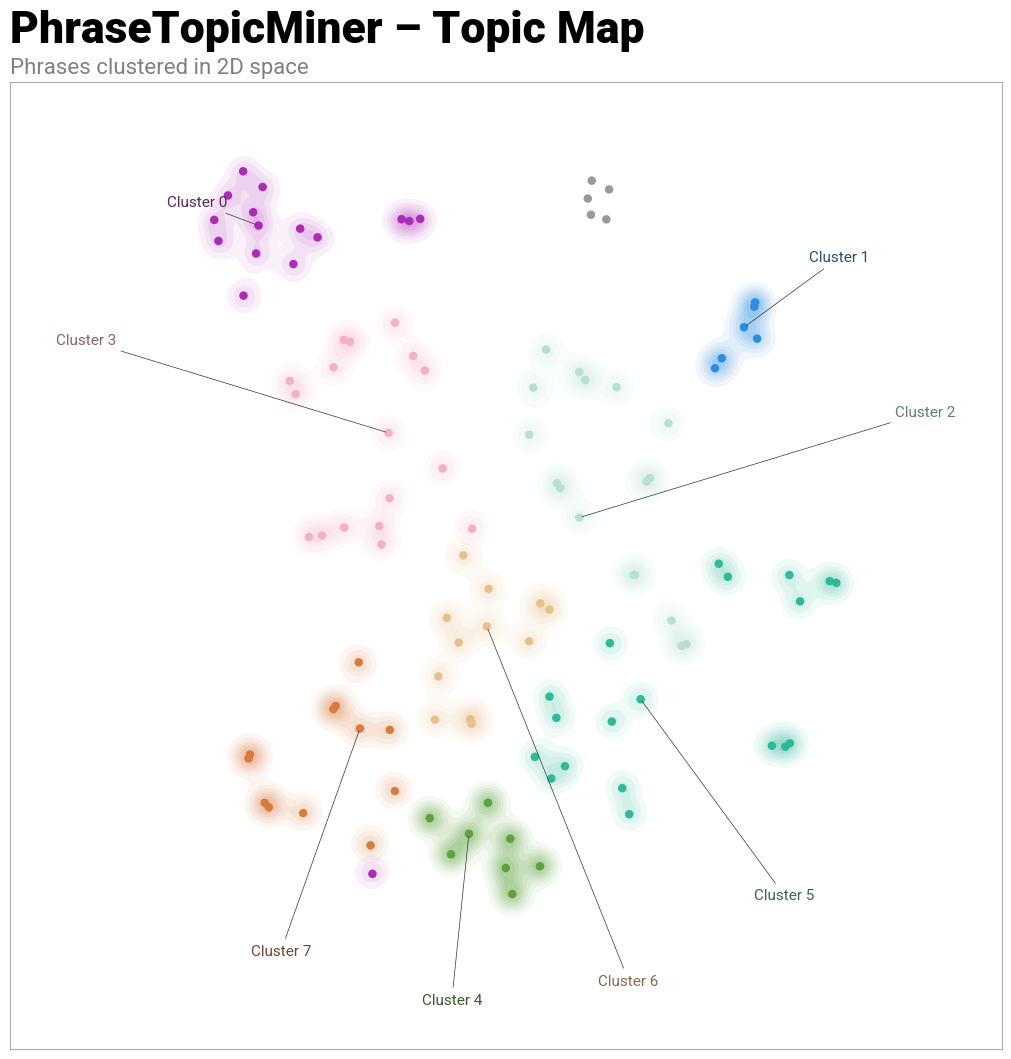

In [22]:
# Static PNG:
fig_static, ax = ptm.make_datamapplot_static(
    core,
    cluster_name_map=None,
    save_path="topic_map.png",
    label_font_size=11,
    use_medoids=True,
)

<InteractiveFigure width=100% height=800>
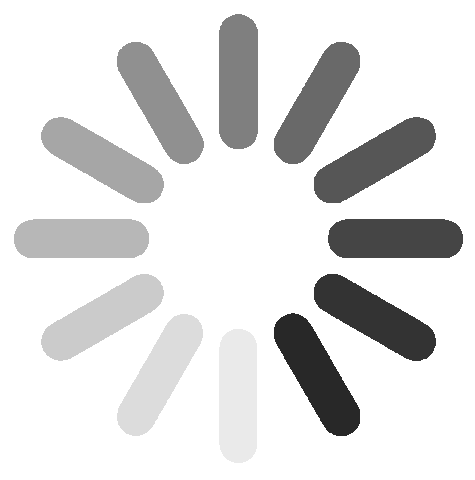

In [24]:
# Interactive topic map with highlighted sentences in the hover
fig_int = ptm.make_datamapplot_interactive(
    core,
    sentences_by_doc=sentences_by_doc,
    cluster_name_map=None,
    point_size=5,  
    save_html_path="phrase_topics.html",
)

# In Jupyter: `display(fig_int)`
display(fig_int)

## `TopicLabeler`

In [25]:
import warnings
warnings.filterwarnings('ignore')

from dotenv import load_dotenv
load_dotenv(override=True)

True

### How to use this from your notebook
### A. LLM-agnostic, simplest path (no Agents)

Using the official `openai` Python SDK:

In [26]:
from openai import OpenAI
from phrasetopicminer import TopicLabeler
import inspect

client = OpenAI()  # create once, reuse

def simple_llm(prompt: str) -> str:
    resp = client.responses.create(
        model="gpt-4.1-mini",
        temperature=0.1,
        input=prompt,
    )
    # `output_text` is already the full aggregated string
    return resp.output_text

labeler = TopicLabeler(
    llm=simple_llm,
    max_phrases_per_cluster=25,
    max_sentences_per_cluster=40,
    include_noise=False,
)


In [27]:
labels = await labeler.label_topics_async(core, sentences_by_doc)


[TopicLabeler] Found cluster_ids in core_result: [-1, 0, 1, 2, 3, 4, 5, 6, 7]
[TopicLabeler] Labeling 8 cluster(s): [0, 1, 2, 3, 4, 5, 6, 7]
[TopicLabeler] Prepared cluster inputs (phrases + sentences) for 8 cluster(s).
[TopicLabeler] Calling LLM for cluster 0...
[TopicLabeler] Calling LLM for cluster 1...
[TopicLabeler] Calling LLM for cluster 2...
[TopicLabeler] Calling LLM for cluster 3...
[TopicLabeler] Calling LLM for cluster 4...
[TopicLabeler] Calling LLM for cluster 5...
[TopicLabeler] Calling LLM for cluster 6...
[TopicLabeler] Calling LLM for cluster 7...


NameError: name 'inspect' is not defined

In [32]:
import json
for cluster in labels.labeled_clusters:
    print(json.dumps({
        "id": cluster.cluster_id,
        "title": cluster.label.title,
        "description": cluster.label.description,
        "top_phrases": [p[0] for p in cluster.phrases_with_counts[:5]],
        "importance_score": cluster.importance_score,
    }, indent=2))

NameError: name 'labels' is not defined

### B. Using LangChain ChatOpenAI directly

In [57]:
from langchain_openai import ChatOpenAI
# from phrasetopicminer import TopicLabeler

lc_llm = ChatOpenAI(model="gpt-4o-mini", temperature=0)

labeler = TopicLabeler(
    llm=lc_llm,                       # we handle .invoke / .ainvoke internally
    max_phrases_per_cluster=25,
    max_sentences_per_cluster=40,
    include_noise=False,
)

# script:
# labels = labeler.label_topics(core_result=core, sentences_by_doc)

# notebook:
labels = await labeler.label_topics_async(core, sentences_by_doc)

[TopicLabeler] Found cluster_ids in core_result: [-1, 0, 1, 2, 3, 4, 5, 6, 7]
[TopicLabeler] Labeling 8 cluster(s): [0, 1, 2, 3, 4, 5, 6, 7]
[TopicLabeler] Prepared cluster inputs (phrases + sentences) for 8 cluster(s).
[TopicLabeler] Calling LLM for cluster 0...
[TopicLabeler] Calling LLM for cluster 1...
[TopicLabeler] Calling LLM for cluster 2...
[TopicLabeler] Calling LLM for cluster 3...
[TopicLabeler] Calling LLM for cluster 4...
[TopicLabeler] Calling LLM for cluster 5...
[TopicLabeler] Calling LLM for cluster 6...
[TopicLabeler] Calling LLM for cluster 7...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[TopicLabeler] LLM output for cluster 1: {
  "title": "Phrase-Centric Topic Modeling",
  "description": "This topic focuses on the concept of phrase-centric topi...
[TopicLabeler] LLM output for cluster 5: {
  "title": "Evolving Team Dynamics and Insights",
  "description": "This topic explores how teams evolve over time thr...
[TopicLabeler] LLM output for cluster 2: {
  "title": "Tracking Themes in Intellectual Discourse",
  "description": "This topic focuses on the analysis of recurr...
[TopicLabeler] LLM output for cluster 6: {
  "title": "Understanding Customer-Centric Product Development",
  "description": "This topic explores the importance ...
[TopicLabeler] LLM output for cluster 0: {
  "title": "Phrase-Centric Topic Modeling",
  "description": "This topic focuses on the extraction and analysis of key...
[TopicLabeler] LLM output for cluster 7: {
  "title": "Innovations in Research Evaluation",
  "description": "This topic focuses on the evolving landscape of res...
[TopicLabe

In [60]:
import json
for cluster in labels.labeled_clusters:
    print(json.dumps({
        "id": cluster.cluster_id,
        "title": cluster.label.title,
        "description": cluster.label.description,
        "top_phrases": [p[0] for p in cluster.phrases_with_counts[:5]],
        "importance_score": cluster.importance_score,
    }, indent=2))

{
  "id": 0,
  "title": "Phrase-Centric Topic Modeling",
  "description": "This topic focuses on the extraction and analysis of key phrases from user interview transcripts and other documents. By mining phrases, the model reveals coherent themes and patterns that reflect user experiences and challenges. It emphasizes the importance of richer expressions over single words, allowing for a more nuanced understanding of concepts. Additionally, it tracks the evolution of these phrases over time, providing insights into emerging and fading ideas.",
  "top_phrases": [
    "phrase",
    "phrasetopicminer",
    "phrases",
    "phrases reveals",
    "mining phrases"
  ],
  "importance_score": 65.16390691329298
}
{
  "id": 5,
  "title": "Evolving Team Dynamics and Insights",
  "description": "This topic explores how teams evolve over time through recurring meetings and discussions. It highlights the importance of identifying and clustering themes such as technical debt and user feedback to track 

### C. Agents SDK path

In [61]:
from agents import Agent
# from phrasetopicminer import TopicLabeler

topic_agent = Agent(
    name="PhraseTopicLabeler",
    instructions=(
        "You are a topic labeling assistant. "
        "Given key phrases and example sentences for a single topic, "
        "you must respond ONLY with JSON containing 'title' and "
        "'description'."
    ),
    model="gpt-4o-mini",
)

labeler = TopicLabeler(
    agent=topic_agent,
    max_phrases_per_cluster=25,
    max_sentences_per_cluster=40,
    include_noise=False,
)

labeling_result = await labeler.label_topics_async(core, sentences_by_doc)

Trace already exists. Creating a new trace, but this is probably a mistake.
Trace already exists. Creating a new trace, but this is probably a mistake.
Trace already exists. Creating a new trace, but this is probably a mistake.
Trace already exists. Creating a new trace, but this is probably a mistake.
Trace already exists. Creating a new trace, but this is probably a mistake.
Trace already exists. Creating a new trace, but this is probably a mistake.
Trace already exists. Creating a new trace, but this is probably a mistake.
Trace already exists. Creating a new trace, but this is probably a mistake.


[TopicLabeler] Found cluster_ids in core_result: [-1, 0, 1, 2, 3, 4, 5, 6, 7]
[TopicLabeler] Labeling 8 cluster(s): [0, 1, 2, 3, 4, 5, 6, 7]
[TopicLabeler] Prepared cluster inputs (phrases + sentences) for 8 cluster(s).
[TopicLabeler] Calling LLM for cluster 0...
[TopicLabeler] Calling LLM for cluster 1...
[TopicLabeler] Calling LLM for cluster 2...
[TopicLabeler] Calling LLM for cluster 3...
[TopicLabeler] Calling LLM for cluster 4...
[TopicLabeler] Calling LLM for cluster 5...
[TopicLabeler] Calling LLM for cluster 6...
[TopicLabeler] Calling LLM for cluster 7...
[TopicLabeler] LLM output for cluster 4: {
  "title": "Educator's Guide to Effective Practices",
  "description": "This topic focuses on strategies for educators...
[TopicLabeler] LLM output for cluster 0: {
  "title": "Phrase-Centric Topic Mining",
  "description": "This topic focuses on extracting and analyzing key phrases...
[TopicLabeler] LLM output for cluster 1: {
  "title": "Phrase-Centric Topic Modeling",
  "descript

## `visualization_datamap` with cluster label

In [62]:
cluster_name_map = labeling_result.cluster_name_map

Calculating medoids: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 640.30it/s]


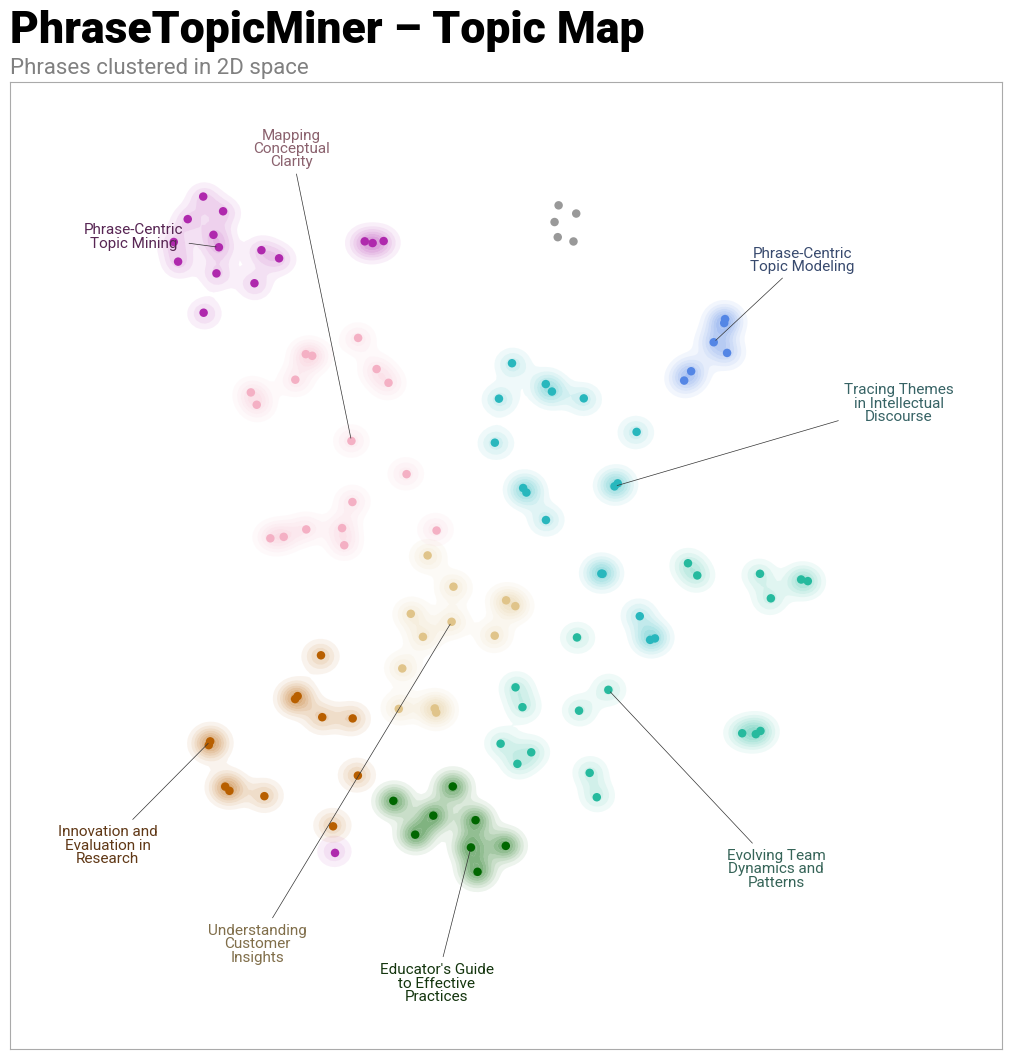

In [63]:
# Static PNG:
fig, ax = ptm.make_datamapplot_static(
    core,
    cluster_name_map=cluster_name_map,
    save_path="topic_map.png",
    label_font_size=11,
    use_medoids=True,
)

<InteractiveFigure width=100% height=800>
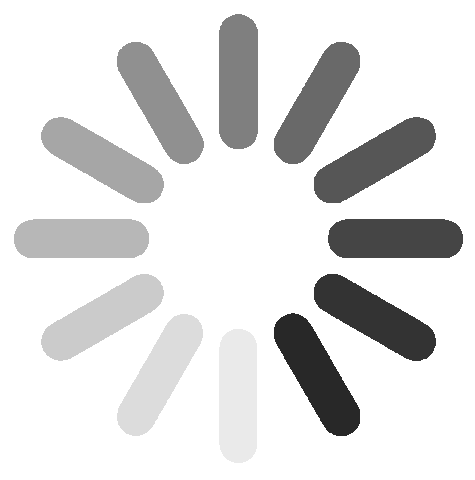

In [65]:
# Interactive topic map with highlighted sentences in the hover
fig_int = ptm.make_datamapplot_interactive(
    core,
    sentences_by_doc=sentences_by_doc,
    cluster_name_map=cluster_name_map,
    point_size=5,  
    save_html_path="phrase_topics.html",
)

# In Jupyter: `display(fig_int)`
display(fig_int)

# Archive

In [33]:
# %pip install langchain_core

In [34]:
# %pip install langchain

In [35]:
# %pip install langchain-core

In [36]:
from langchain_openai import ChatOpenAI

# Initialize with any LLM that supports structured output
llm = ChatOpenAI(model="gpt-4o-mini", temperature=0)
labeler = TopicLabeler(llm, batch_size=5, verbose=True)

# Prepare cluster inputs (from your TopicModeler)
cluster_inputs = [
    ClusterLabelingInput(
        cluster_id=0,
        phrases_with_counts=[
            ("machine learning", 45),
            ("neural networks", 38),
            ("deep learning", 32),
            ("model training", 28),
        ],
        representative_phrases=["machine learning", "neural networks", "deep learning"],
        example_sentences=[
            "We use deep learning to train our neural networks on large datasets.",
            "Machine learning models require extensive tuning and validation.",
            "Our neural network achieved 95% accuracy on the test set.",
        ],
    ),
    ClusterLabelingInput(
        cluster_id=1,
        phrases_with_counts=[
            ("database", 52),
            ("SQL query", 41),
            ("relational database", 38),
            ("data warehouse", 29),
        ],
        representative_phrases=["database", "SQL query", "data warehouse"],
        example_sentences=[
            "The SQL query optimized our data warehouse performance by 30%.",
            "We migrated to a relational database for better scalability.",
            "Database indexing reduced query execution time significantly.",
        ],
    ),
]

# Label in sync mode
result = labeler.label_clusters(cluster_inputs, async_mode=False)

# Access results
print(result.cluster_name_map)
# {0: 'Neural Networks and Deep Learning', 1: 'Databases and SQL'}

print(result.labels_by_cluster[0])
# TopicLabelModel(
#     title='Neural Networks and Deep Learning',
#     description='This cluster focuses on machine learning techniques, particularly...'
# )

# Export for visualization
import json
for cluster in result.labeled_clusters:
    print(json.dumps({
        "id": cluster.cluster_id,
        "title": cluster.label.title,
        "description": cluster.label.description,
        "top_phrases": [p[0] for p in cluster.phrases_with_counts[:3]],
    }, indent=2))

Labeling cluster 0...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


✓ Cluster 0: Advancements in Machine Learning
Labeling cluster 1...
✓ Cluster 1: Database Management and Optimization
{0: 'Advancements in Machine Learning', 1: 'Database Management and Optimization'}
title='Advancements in Machine Learning' description='This topic focuses on the latest developments in machine learning, particularly emphasizing deep learning and neural networks. It discusses the processes involved in model training and the importance of tuning and validation for achieving high accuracy in predictive models. The integration of these technologies is transforming data analysis and decision-making across various fields.'
{
  "id": 0,
  "title": "Advancements in Machine Learning",
  "description": "This topic focuses on the latest developments in machine learning, particularly emphasizing deep learning and neural networks. It discusses the processes involved in model training and the importance of tuning and validation for achieving high accuracy in predictive models. The i

In [42]:
from phrasetopicminer import (
    ClusterLabelingResult, 
    ClusterLabelingInput, 
    TopicLabelModel, 
    LabeledTopicCluster, 
    TopicLabelingResult,
    TopicCoreResult
)


import asyncio
import inspect
from datetime import datetime
import json
from dataclasses import dataclass
from typing import (
    Any,
    Callable,
    Dict,
    List,
    Optional,
    Sequence,
    Set,
    Tuple,
)

from pydantic import BaseModel, Field, ValidationError

from agents import Agent, Runner, trace  # OpenAI Agents SDK


# -------------------------------------------------------------------
# TopicLabeler – main public API
# -------------------------------------------------------------------


class TopicLabeler:
    """
    LLM-backed topic labeling helper.

    Two ways to use it
    ------------------
    1) With the OpenAI Agents SDK (original design):

        from agents import Agent
        topic_agent = Agent(...)
        labeler = TopicLabeler(agent=topic_agent, ...)

    2) With a generic LLM object or callable (LLM-agnostic):

        # simplest: pass a function that returns a string
        def simple_llm(prompt: str) -> str:
            ...

        labeler = TopicLabeler(llm=simple_llm, ...)

        # or pass a LangChain ChatOpenAI, which has .invoke() / .ainvoke():
        from langchain_openai import ChatOpenAI
        lc_llm = ChatOpenAI(model="gpt-4o-mini", temperature=0)
        labeler = TopicLabeler(llm=lc_llm, ...)

    Exactly one of `agent` or `llm` must be provided.
    """

    def __init__(
        self,
        agent: Optional[Agent] = None,
        *,
        llm: Optional[Any] = None,
        max_phrases_per_cluster: int = 25,
        max_sentences_per_cluster: int = 40,
        include_noise: bool = False,
        labeler_name: str = "default_topic_labeler",
        log_fn: Optional[Callable[[str], None]] = print,
    ) -> None:
        """
        Parameters
        ----------
        agent:
            Optional `Agent` instance from the OpenAI Agents SDK.
            If provided, TopicLabeler will call `Runner.run(agent, prompt)`.
        llm:
            Optional generic LLM backend. Can be either:

            - a callable:  `str -> str` or `str -> Awaitable[str]`
            - or an object with `.invoke(prompt)` / `.ainvoke(prompt)`
              (e.g. LangChain's `ChatOpenAI`).

            If `agent` is None and `llm` is provided, TopicLabeler
            will use this backend instead of Agents.
        max_phrases_per_cluster:
            Maximum number of phrases (sorted by frequency) to send
            to the LLM for each cluster.
        max_sentences_per_cluster:
            Maximum number of example sentences to include per cluster.
        include_noise:
            If True, also label the noise cluster (cluster_id == -1).
        labeler_name:
            Free-form identifier for this labeler configuration, e.g.
            the underlying LLM/model or agent name. Stored in `config`.
        log_fn:
            Callable used for progress logging, e.g.:

                - `print` (default, console / Jupyter)
                - `st.write` / `st.markdown` (Streamlit)
                - any custom logger you like
        """
        if (agent is None) == (llm is None):
            raise ValueError(
                "TopicLabeler expects exactly one of `agent` or `llm`.\n"
                "Pass an OpenAI Agents `Agent` via `agent=`, or a plain "
                "LLM callable / object via `llm=`."
            )

        self.agent: Optional[Agent] = agent
        self.llm: Optional[Any] = llm

        self.max_phrases_per_cluster = max_phrases_per_cluster
        self.max_sentences_per_cluster = max_sentences_per_cluster
        self.include_noise = include_noise
        self.labeler_name = labeler_name
        self._log_fn = log_fn or (lambda _msg: None)

    # ------------- small logger wrapper -------------

    def _log(self, msg: str) -> None:
        """Internal logging helper."""
        try:
            self._log_fn(msg)
        except Exception:
            # Never let logging break the pipeline
            pass

    # ------------------------------------------------------------------
    # Public sync entrypoint (for scripts / CLIs)
    # ------------------------------------------------------------------

    def label_topics(
        self,
        core_result: TopicCoreResult,
        sentences_by_doc: Sequence[Sequence[str]],
        *,
        cluster_ids: Optional[Sequence[int]] = None,
    ) -> TopicLabelingResult:
        """
        Synchronous convenience wrapper around `label_topics_async`.

        In non-async environments (plain Python scripts), you can call this directly.
        In notebooks / async contexts, prefer:

            result = await labeler.label_topics_async(...)

        Raises a clear error if called from an already-running
        event loop (common in Jupyter) to avoid silent hangs.
        """
        try:
            loop = asyncio.get_running_loop()
        except RuntimeError:
            loop = None

        if loop and loop.is_running():
            raise RuntimeError(
                "TopicLabeler.label_topics() was called from an async "
                "context (e.g. Jupyter). Please use "
                "`await label_topics_async(...)` instead."
            )

        return asyncio.run(
            self.label_topics_async(
                core_result,
                sentences_by_doc,
                cluster_ids=cluster_ids,
            )
        )

    # ------------------------------------------------------------------
    # Public async API (for notebooks / advanced usage)
    # ------------------------------------------------------------------

    async def label_topics_async(
        self,
        core_result: TopicCoreResult,
        sentences_by_doc: Sequence[Sequence[str]],
        *,
        cluster_ids: Optional[Sequence[int]] = None,
    ) -> TopicLabelingResult:
        """
        Asynchronously label clusters in a TopicCoreResult using `self.agent`.

        Parameters
        ----------
        core_result:
            Output of TopicModeler.fit_core (TopicCoreResult).
        sentences_by_doc:
            Nested list of original sentences, as returned from PhraseMiner:
            sentences_by_doc[doc_index][sent_index] -> sentence text.
        cluster_ids:
            Optional explicit list of cluster_ids to label. If None, all
            clusters in `core_result.phrases_df` are considered, with optional
            exclusion of noise (-1) depending on `include_noise`.

        Returns
        -------
        TopicLabelingResult
            Rich result object containing one LabeledTopicCluster per cluster,
            convenience mappings, and a config dictionary.
        """
        df = core_result.phrases_df

        # Map cluster_id → TopicCluster metadata (if available)
        cluster_meta_map = {c.cluster_id: c for c in core_result.clusters}

        # Decide which cluster IDs to label
        all_cluster_ids = sorted(df["cluster_id"].unique().tolist())
        self._log(
            f"[TopicLabeler] Found cluster_ids in core_result: {all_cluster_ids}"
        )

        # Filter cluster ids according to user request and noise flag
        if cluster_ids is None:
            cluster_ids_to_use = [
                cid for cid in all_cluster_ids
                if (self.include_noise or cid != -1)
            ]
        else:
            cluster_ids_to_use = [
                cid for cid in cluster_ids
                if (self.include_noise or cid != -1)
            ]

        if not cluster_ids_to_use:
            raise ValueError(
                "No clusters selected for labeling. "
                "Check include_noise / cluster_ids."
            )

        self._log(
            f"[TopicLabeler] Labeling {len(cluster_ids_to_use)} cluster(s): {cluster_ids_to_use}"
        )

        # --------------------------------------------------
        # Build ClusterLabelingInput for each cluster
        # --------------------------------------------------
        inputs: List[ClusterLabelingInput] = []

        for cid in cluster_ids_to_use:
            sub = df[df["cluster_id"] == cid].copy()
            if sub.empty:
                continue

            # Phrases sorted by frequency (descending)
            sub_sorted = sub.sort_values("count", ascending=False)
            phrases_with_counts: List[Tuple[str, int]] = [
                (p, int(c))
                for p, c in zip(sub_sorted["phrase"], sub_sorted["count"])
            ]

            # Limit phrases passed to the LLM
            phrases_with_counts = phrases_with_counts[: self.max_phrases_per_cluster]

            # Representative phrases from TopicModeler, if available
            rep_phrases: List[str] = []
            meta = cluster_meta_map.get(cid)
            if meta is not None and meta.representative_phrases:
                rep_phrases = meta.representative_phrases
            else:
                # Fallback: top few phrases by frequency
                rep_phrases = [p for p, _ in phrases_with_counts[:10]]

            # Example sentences for this cluster
            example_sentences = self._collect_example_sentences_for_cluster(
                phrases_with_counts=phrases_with_counts,
                phrase_occurrences=core_result.phrase_occurrences,
                sentences_by_doc=sentences_by_doc,
            )

            inputs.append(
                ClusterLabelingInput(
                    cluster_id=int(cid),
                    phrases_with_counts=phrases_with_counts,
                    representative_phrases=rep_phrases,
                    example_sentences=example_sentences,
                )
            )

        if inputs:
            self._log(
                "[TopicLabeler] Prepared cluster inputs "
                f"(phrases + sentences) for {len(inputs)} cluster(s)."
            )
        else:
            raise ValueError("No ClusterLabelingInput objects could be built.")

        # --------------------------------------------------
        # Call the agent concurrently for all clusters under a top-level trace
        # --------------------------------------------------
        with trace(f"PhraseTopicMiner TopicLabeler (clusters={len(inputs)})"):
            tasks = [self._label_single_cluster(inp) for inp in inputs]
            raw_results: List[ClusterLabelingResult] = await asyncio.gather(*tasks)
        
        # --------------------------------------------------
        # Assemble LabeledTopicCluster objects and mappings
        # --------------------------------------------------
        labeled_clusters: List[LabeledTopicCluster] = []
        labels_by_cluster: Dict[int, TopicLabelModel] = {}
        cluster_name_map: Dict[int, str] = {}

        # Build a quick lookup for inputs by cluster_id
        input_by_cid: Dict[int, ClusterLabelingInput] = {
            inp.cluster_id: inp for inp in inputs
        }

        for res in raw_results:
            cid = res.cluster_id
            label = res.label
            inp = input_by_cid[cid]

            labels_by_cluster[cid] = label
            cluster_name_map[cid] = label.title

            meta = cluster_meta_map.get(cid)
            importance = getattr(meta, "importance_score", None)
            rank = getattr(meta, "rank", None)

            labeled_clusters.append(
                LabeledTopicCluster(
                    cluster_id=cid,
                    label=label,
                    phrases_with_counts=inp.phrases_with_counts,
                    representative_phrases=inp.representative_phrases,
                    example_sentences=inp.example_sentences,
                    importance_score=importance,
                    rank=rank,
                    raw_response=res.raw_response,
                )
            )

        # Sort clusters by rank (if available), then by importance, then id
        labeled_clusters.sort(
            key=lambda lc: (
                float("inf") if lc.rank is None else lc.rank,
                -1.0 if lc.importance_score is None else -lc.importance_score,
                lc.cluster_id,
            )
        )

        # --------------------------------------------------
        # Build config dictionary (includes TopicModeler config)
        # --------------------------------------------------
        config: Dict[str, Any] = {
            "labeler_name": self.labeler_name,
            "max_phrases_per_cluster": self.max_phrases_per_cluster,
            "max_sentences_per_cluster": self.max_sentences_per_cluster,
            "include_noise": self.include_noise,
            "num_clusters_available": len(all_cluster_ids),
            "num_clusters_labeled": len(labeled_clusters),
            "timestamp": datetime.utcnow().isoformat() + "Z",
            # full reference to the originating topic model run:
            "topic_modeler_config": core_result.config,
        }

        self._log("[TopicLabeler] ✅  Labeling complete.")
        return TopicLabelingResult(
            labeled_clusters=labeled_clusters,
            labels_by_cluster=labels_by_cluster,
            cluster_name_map=cluster_name_map,
            config=config,
        )

    # ------------------------------------------------------------------
    # Internal helpers – building cluster inputs
    # ------------------------------------------------------------------

    def _collect_example_sentences_for_cluster(
        self,
        phrases_with_counts: List[Tuple[str, int]],
        phrase_occurrences: Dict[str, List["PhraseRecord"]],
        sentences_by_doc: List[List[str]],
    ) -> List[str]:
        """
        Collect up to `max_sentences_per_cluster` example sentences for a cluster.

        Strategy
        --------
        - Iterate phrases in descending frequency order.
        - For each phrase, collect sentences from phrase_occurrences.
        - Use (doc_index, sent_index) + text string to deduplicate.
        """
        max_sents = self.max_sentences_per_cluster
        examples: List[str] = []
        seen_keys = set()

        for phrase, _count in phrases_with_counts:
            occ_list = phrase_occurrences.get(phrase, [])
            for occ in occ_list:
                try:
                    sent_text = sentences_by_doc[occ.doc_index][occ.sent_index]
                except (IndexError, KeyError):
                    continue

                key = (occ.doc_index, occ.sent_index, sent_text)
                if key in seen_keys:
                    continue

                seen_keys.add(key)
                examples.append(sent_text)

                if len(examples) >= max_sents:
                    return examples

        return examples

    
    def _build_cluster_labeling_input(
        self,
        *,
        cluster_id: int,
        core_result: TopicCoreResult,
        sentences_by_doc: Sequence[Sequence[str]],
        cluster_obj: Optional[Any] = None,
    ) -> ClusterLabelingInput:
        """
        Collect phrases + counts + example sentences for a single cluster.
        """
        df = core_result.phrases_df

        sub = df[df["cluster_id"] == cluster_id].copy()
        if sub.empty:
            raise ValueError(f"No phrases found for cluster_id={cluster_id}")

        # Sort phrases by frequency (descending)
        sub.sort_values("count", ascending=False, inplace=True)

        phrases_with_counts: List[Tuple[str, int]] = list(
            zip(
                sub["phrase"].tolist(),
                sub["count"].astype(int).tolist(),
            )
        )

        if self.max_phrases_per_cluster is not None:
            phrases_with_counts = phrases_with_counts[: self.max_phrases_per_cluster]

        # Representative phrases – prefer TopicCluster, fall back to top phrases
        if cluster_obj is not None and getattr(
            cluster_obj, "representative_phrases", None
        ):
            representative_phrases = list(
                cluster_obj.representative_phrases[: self.max_phrases_per_cluster]
            )
        else:
            representative_phrases = [
                p for p, _ in phrases_with_counts[: min(10, len(phrases_with_counts))]
            ]

        # Example sentences from phrase_occurrences
        phrase_occurrences: Dict[str, List[PhraseRecord]] = core_result.phrase_occurrences

        example_sentences: List[str] = []
        seen_indices: Set[Tuple[int, int]] = set()

        for phrase, _cnt in phrases_with_counts:
            for rec in phrase_occurrences.get(phrase, []):
                doc_idx = int(rec.doc_index)
                sent_idx = int(rec.sent_index)
                key = (doc_idx, sent_idx)

                if key in seen_indices:
                    continue

                try:
                    sent_text = sentences_by_doc[doc_idx][sent_idx]
                except (IndexError, TypeError):
                    continue

                sent_text = sent_text.strip()
                if not sent_text:
                    continue

                example_sentences.append(sent_text)
                seen_indices.add(key)

                if len(example_sentences) >= self.max_sentences_per_cluster:
                    break

            if len(example_sentences) >= self.max_sentences_per_cluster:
                break

        self._log(
            f"[TopicLabeler] Cluster {cluster_id}: "
            f"{len(phrases_with_counts)} phrases sent, "
            f"{len(example_sentences)} example sentences."
        )

        return ClusterLabelingInput(
            cluster_id=cluster_id,
            phrases_with_counts=phrases_with_counts,
            representative_phrases=representative_phrases,
            example_sentences=example_sentences,
        )

    # ------------------------------------------------------------------
    # Internal helpers – LLM call & prompt
    # ------------------------------------------------------------------

    async def _call_llm(self, prompt: str, cluster_id: int) -> str:
        """
        Unified LLM call.

        - If `self.agent` is set, use the OpenAI Agents Runner.
        - Otherwise, use `self.llm`:

            * callable(prompt)  -> text or awaitable
            * or object with .ainvoke(prompt) / .invoke(prompt)
              (LangChain-style).
        """
        # --- 1) Agents SDK path -----------------------------------------
        if self.agent is not None:
            if Runner is None:
                raise RuntimeError(
                    "TopicLabeler was configured with `agent=...`, but the "
                    "`agents` package is not installed."
                )

            with trace(
                f"label_cluster_{cluster_id}_{datetime.utcnow().isoformat()}"
            ):
                result = await Runner.run(self.agent, prompt)

            raw = getattr(result, "final_output", "") or ""
            return raw.strip()

        # --- 2) Generic LLM path ---------------------------------------
        if self.llm is None:
            raise RuntimeError(
                "TopicLabeler has neither `agent` nor `llm` configured."
            )

        backend = self.llm

        # (a) Bare callable: func(prompt) -> text or awaitable
        if callable(backend) and not hasattr(backend, "invoke") and not hasattr(backend, "ainvoke"):
            out = backend(prompt)
            if inspect.isawaitable(out):
                out = await out

        # (b) LangChain-style: has .ainvoke(prompt)
        elif hasattr(backend, "ainvoke"):
            out = await backend.ainvoke(prompt)

        # (c) LangChain-style: has .invoke(prompt)
        elif hasattr(backend, "invoke"):
            out = backend.invoke(prompt)

        else:
            raise TypeError(
                "llm= must be either a callable, or an object with "
                "an `.invoke(prompt)` or `.ainvoke(prompt)` method."
            )

        # --- 3) Normalise various outputs to a plain string ------------

        # simple string
        if isinstance(out, str):
            return out.strip()

        # LangChain messages (have `.content`)
        content = getattr(out, "content", None)
        if content is not None:
            return str(content).strip()

        # OpenAI-style responses with .choices[0].message.content
        choices = getattr(out, "choices", None)
        if choices:
            first = choices[0]
            msg = getattr(first, "message", None) or getattr(first, "delta", None)
            if msg is not None and getattr(msg, "content", None) is not None:
                return str(msg.content).strip()

        # dict-like { "text": "..."} or {"content": "..."}
        if isinstance(out, dict):
            for key in ("text", "content", "output"):
                if key in out:
                    return str(out[key]).strip()

        # last-resort fallback
        return str(out).strip()
        

    async def _label_single_cluster(
        self,
        cluster_input: ClusterLabelingInput,
    ) -> ClusterLabelingResult:
        """
        Label a single cluster using either an Agents `Agent` or a generic LLM.

        The actual backend is decided by `_call_llm`.

        Returns
        -------
        ClusterLabelingResult
            Structured result with cluster_id, TopicLabelModel, and
            the raw text output from the agent (for audit/debugging).
        """
        prompt = self._build_prompt(cluster_input)

        self._log(
            f"[TopicLabeler] Calling LLM for cluster {cluster_input.cluster_id}..."
        )

        raw_output = await self._call_llm(prompt, cluster_input.cluster_id)

        self._log(
            f"[TopicLabeler] LLM output for cluster {cluster_input.cluster_id}: "
            f"{raw_output[:120]}{'...' if len(raw_output) > 120 else ''}"
        )

        # Prefer strict JSON → TopicLabelModel
        label = self._parse_label_output(raw_output, cluster_input.cluster_id)

        return ClusterLabelingResult(
            cluster_id=cluster_input.cluster_id,
            label=label,
            raw_response=raw_output,
        )

    @staticmethod
    def _build_prompt(cluster_input: ClusterLabelingInput) -> str:
        """
        Construct a concise, model-agnostic prompt that asks for a
        strict JSON response.
        """
        ph_lines = "\n".join(
            f"- {phrase} [{count}]"
            for phrase, count in cluster_input.phrases_with_counts
        )
        sent_lines = "\n".join(
            f"- {s}" for s in cluster_input.example_sentences
        )

        return f"""
                You are a topic labeling assistant for a phrase-based topic model.
                
                You are given:
                - A set of key phrases for a single topic, each with its frequency.
                - A small set of example sentences where these phrases occur.
                
                Your task for this ONE topic is to:
                1. Propose a short, 3–8 word title that best names the topic.
                2. Write a concise, 2–6 sentence description of what this topic is about.
                
                Guidelines:
                - Focus ONLY on the phrases and sentences provided.
                - Do NOT mention 'cluster', 'topic number', or 'phrases' in the title.
                - Avoid generic titles like "Miscellaneous" unless the content is truly incoherent.
                
                Return your answer as a SINGLE JSON object with EXACTLY these keys:
                
                {{
                  "title": "short title here",
                  "description": "2–6 sentence description here"
                }}
                
                Do not include any additional text, commentary, markdown, or code fences.
                Topic id: {cluster_input.cluster_id}
                
                Representative phrases (phrase [count]):
                {ph_lines}
                
                Example sentences:
                {sent_lines}
                """.strip()

    @staticmethod
    def _parse_label_output(
        raw_output: str,
        cluster_id: int,
    ) -> TopicLabelModel:
        """
        Parse the agent's output into a TopicLabelModel, with robust
        fallbacks if the model drifts away from strict JSON.
        """
        # First attempt: direct JSON → TopicLabelModel
        try:
            return TopicLabelModel.model_validate_json(raw_output)
        except (ValidationError, json.JSONDecodeError):
            pass

        # Second attempt: json.loads, then TopicLabelModel(**data)
        try:
            data = json.loads(raw_output)
            return TopicLabelModel(**data)
        except Exception:
            pass

        # Last-resort: heuristic fallback – first line = title, rest = description
        lines = [ln.strip() for ln in raw_output.splitlines() if ln.strip()]
        if not lines:
            return TopicLabelModel(
                title=f"Topic {cluster_id}",
                description="No description could be parsed from the model output.",
            )

        title = lines[0][:80]
        description = "\n".join(lines[1:]) or lines[0]
        return TopicLabelModel(title=title, description=description)


In [26]:
from agents import Agent

topic_agent = Agent(
    name="PhraseTopicLabeler",
    instructions=(
        "You are a topic labeling assistant. "
        "Given key phrases and example sentences for a single topic, "
        "you must respond ONLY with JSON containing 'title' and "
        "'description'."
    ),
    model='gpt-4o-mini'
)

labeler = ptm.TopicLabeler(
    topic_agent,
    max_phrases_per_cluster=25,
    max_sentences_per_cluster=40,
    include_noise=False,
)


In [27]:
# Cell is allowed to use `await` in Jupyter
labeling_result = await labeler.label_topics_async(core, sentences_by_doc)

Trace already exists. Creating a new trace, but this is probably a mistake.
Trace already exists. Creating a new trace, but this is probably a mistake.
Trace already exists. Creating a new trace, but this is probably a mistake.
Trace already exists. Creating a new trace, but this is probably a mistake.
Trace already exists. Creating a new trace, but this is probably a mistake.


[TopicLabeler] Found cluster_ids in core_result: [0, 1, 2, 3, 4]
[TopicLabeler] Labeling 5 cluster(s): [0, 1, 2, 3, 4]
[TopicLabeler] Prepared cluster inputs (phrases + sentences) for 5 cluster(s).
[TopicLabeler] Calling agent for cluster 0...
[TopicLabeler] Calling agent for cluster 1...
[TopicLabeler] Calling agent for cluster 2...
[TopicLabeler] Calling agent for cluster 3...
[TopicLabeler] Calling agent for cluster 4...
[TopicLabeler] Agent output for cluster 0: {
  "title": "Everyday Problem Solving",
  "description": "This topic focuses on the challenges individuals face in dail...
[TopicLabeler] Agent output for cluster 4: {
  "title": "Mind-Body Connection in Psychology",
  "description": "This topic explores the intricate relationship betw...
[TopicLabeler] Agent output for cluster 2: {
  "title": "Understanding Mental Health",
  "description": "This topic explores the concept of mental health, emphasiz...
[TopicLabeler] Agent output for cluster 1: {
  "title": "Philosophy of 

In [28]:
cluster_name_map = labeling_result.cluster_name_map

In [29]:
cluster_name_map

{0: 'Everyday Problem Solving',
 1: 'Philosophy of Mind and Monism',
 2: 'Understanding Mental Health',
 3: 'Exploring the Nature of Mind',
 4: 'Mind-Body Connection in Psychology'}

Calculating medoids: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 540.31it/s]


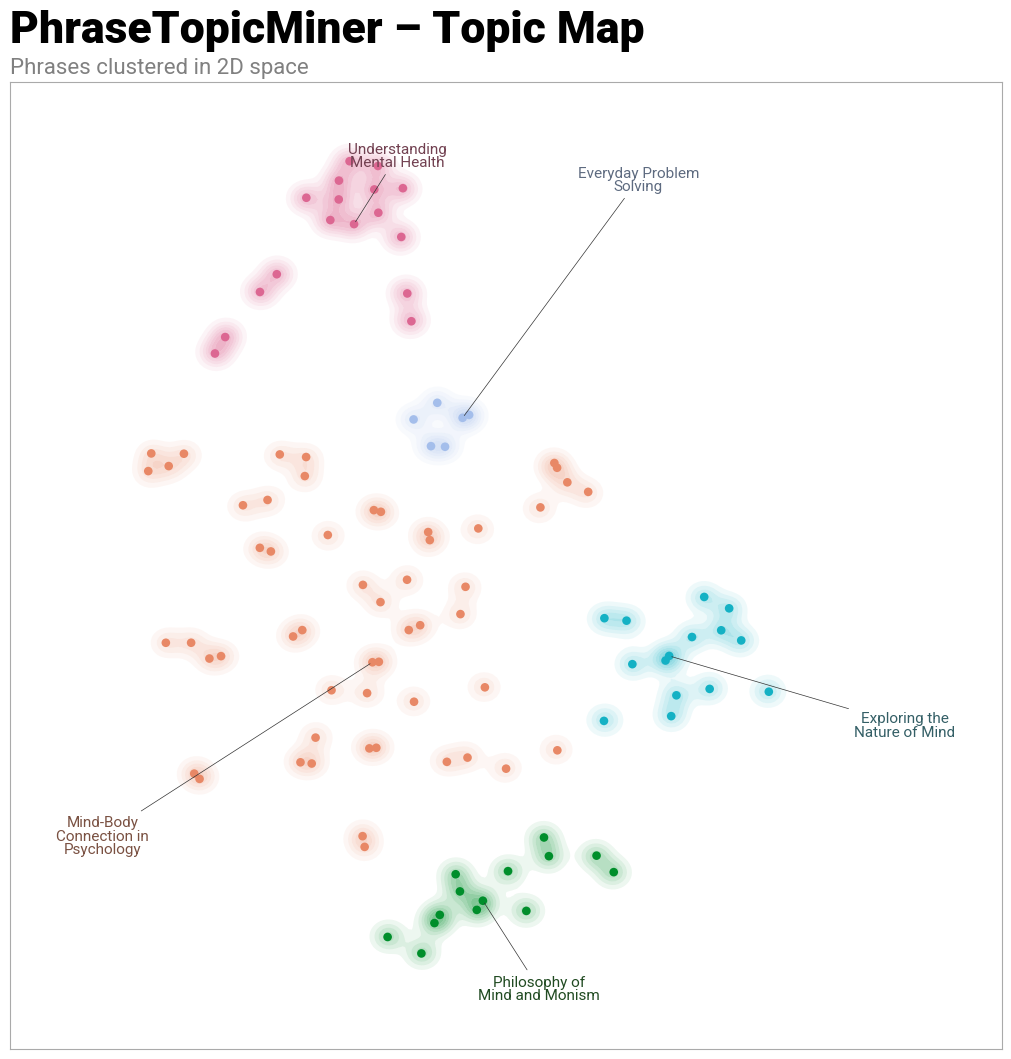

In [30]:
# Static PNG:
fig, ax = ptm.make_datamapplot_static(
    core,
    cluster_name_map=cluster_name_map,
    save_path="topic_map.png",
    label_font_size=11,
    use_medoids=True,
)


<InteractiveFigure width=100% height=800>
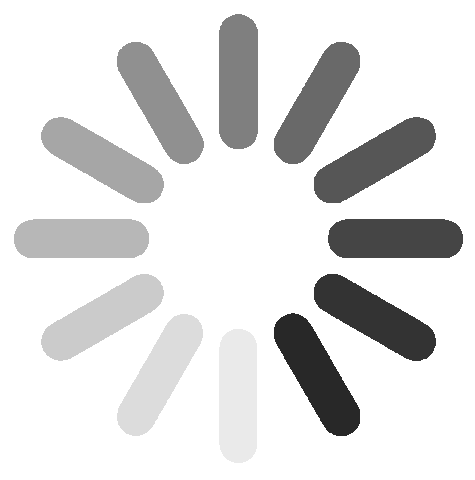

In [31]:
# Interactive topic map with highlighted sentences in the hover
fig_int = ptm.make_datamapplot_interactive(
    core,
    sentences_by_doc=sentences_by_doc,
    cluster_name_map=cluster_name_map,
    point_size=5,  
    save_html_path="phrase_topics.html",
)

# In Jupyter: `display(fig_int)`
display(fig_int)